# Исследование объявлений о продаже квартир
## Описание проекта:

В нашем  распоряжении архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.   

Необходимо изучить данные, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.   

## Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Изучим данные полученные из файла

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Открываем CSV  файл, разделяем данные, записываем в переменную data

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except FileNotFoundError:
    data = pd.read_csv('/Users/aleksandrefimcev/Desktop/real_estate_data.csv', sep = '\t') 

In [3]:
warnings.filterwarnings("ignore")

Взглянем на данные из датасета

In [4]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Предобработка данных

Взглянем на информацию о таблице

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрим на количество пропусков в столбцах

In [6]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Процент пропусков в данных' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось')

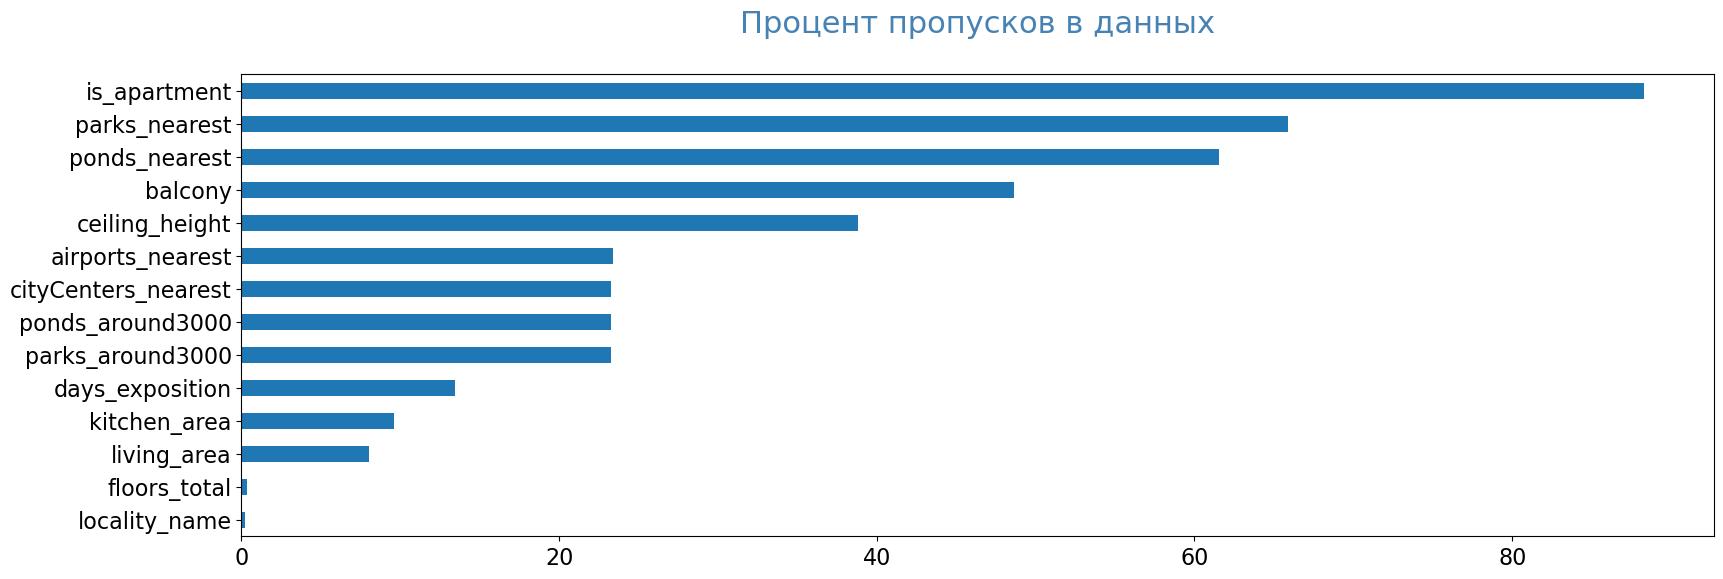

In [7]:
pass_value_barh(data)

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В наборе данных большое количество пропущенных значений,  также присутствуют аномалии в данных.

In [9]:
# Изменим тип данных
data['last_price'] = data['last_price'].astype(int)

Вероятно пропуски в графе количество балконов, обусловлены их отсутствием. Замним пропущенные значения на 0

In [10]:
data['balcony'] = data['balcony'].fillna(0)

Взглянем на количество пропусков в колонке 'is_appartment' возможно пропуски связаны с неверным значением типов данных. Поменяем тип данный object на тип данных bool

In [11]:
data['is_apartment'] = data['is_apartment'].astype(bool)

Видим что после изменения NaN  поменялись на True. Посчитаем количество значенией в колонках 'is_appartment' и 'studio'

In [12]:
data['is_apartment'].value_counts()

True     20974
False     2725
Name: is_apartment, dtype: int64

Так как пропусков в колонках "Количество этажей" и "Название населенного пункта"  менее 1% удалим эти записи, они не помешают анализу.

In [13]:
data = data.dropna(subset = ['floors_total','locality_name'])

In [14]:
#Приведем столбец с количеством этажей в тип целых чисел
data['floors_total']= data['floors_total'].astype(int)

Оставшиеся пропуски оставим как есть , чтобы не искажать полученные данные.

### Найдем и устраним аномалии в данных

Посмотрим какие данные содержит колонка высота потолков

In [15]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Мы видим много разных значений, включая аномальные. Можно предположить что значения 22,6 или 14, на самом деле 2,26 и 1,4. Посмотрим много ли аномальных значений.

In [16]:
print(f'{(data["ceiling_height"]<2).sum()} квартиры с потолками ниже 2ух метров')
print(f'{(data["ceiling_height"]>4).sum()} квартир с потолками выше 4ех метров')

3 квартиры с потолками ниже 2ух метров
75 квартир с потолками выше 4ех метров


Чтобы избежать дальнейшие выбросы отсечем эти значения

In [17]:
data = data.query('(ceiling_height > 2 & ceiling_height < 4) |  ceiling_height.isna()')

Проверим устранены ли аномалии в колонке высоты потолков

In [18]:
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       3.5 , 3.3 , 2.71, 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06, 2.72,
       2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 2.45,
       3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53,
       2.74, 2.96, 2.46, 2.79, 2.95, 2.94, 3.82, 3.54, 3.53, 2.83, 2.4 ,
       3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82,
       3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85,
       3.86, 3.24, 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81,
       3.44, 2.97, 3.14, 2.68, 3.22, 3.27, 2.93, 3.46, 3.47, 3.33, 3.63,
       3.32, 2.98, 2.86, 3.17, 3.28, 3.04, 3.84, 3.23, 3.02, 3.21, 3.43,
       3.78, 3.39, 2.69, 3.31, 3.56, 2.2 , 3.51, 3.93, 3.42, 2.99, 3.49,
       2.91, 3.88, 3.29, 2.25, 3.76, 3.69, 2.89, 3.58, 2.49, 3.48, 3.59])

Посмотрим есть ли аномалии в графе "Удаленность от аэропорта"

In [19]:
data[data['airports_nearest']< 2000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000,34.7,2018-09-23T00:00:00,1,2.7,9,19.8,3,True,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [20]:
# Удалим аномальное значение 
data = data.query('airports_nearest > 10 |  airports_nearest.isna()')

Аномалия Цена квартиры

In [21]:
print(f'Квартир стоимость которых менее 400 000 рублей: {(data["last_price"]<400000).sum()}')

Квартир стоимость которых менее 400 000 рублей: 1


In [22]:
# устраним аномалию в цене, выбрав все квартиры дороже 400000
data = data.query('last_price > 400000')

 В основном дубликаты  в наших данных связаны с тем, что слово посёлок часть пишут через букву е.

Устраним первую часть дубликатов через цикл

In [24]:
#Устраним  дубликаты через цикл
for index in data['locality_name']:
    
    if 'посе' in index:
        data['locality_name'] = data['locality_name'].str.replace('посе','посё')
    elif 'Мур' in index:
         data['locality_name'] = data['locality_name'].replace(index,'посёлок Мурино')
    elif 'Кудро' in index:
         data['locality_name'] = data['locality_name'].replace(index,'деревня Кудрово')
    elif 'Бугр' in index:
         data['locality_name'] = data['locality_name'].replace(index,'посёлок Бугры')

Изменим колонку с датой публикации на более читаемый вид.   
Часы, минуты и секунды нам не потребуются.

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y.%m.%d')

Посмотрим аномальные значения в колонке общей площади

Проверим какие аномалии остались

In [26]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,436.00","23,436.00","14,352.00","20,295.00","23,436.00","21,581.00","21,231.00","23,436.00","23,436.00"
min,0.00,12.00,2.20,1.00,"430,000.00",2.00,1.30,1.00,1.00
max,19.00,900.00,3.98,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


Как видим остались аномалии в колонках:   
- "rooms"
- "total_area"
- "days_exposition"
- "last_price"
- "living_area"  
- "kitchen_area"   
- "floors_total"

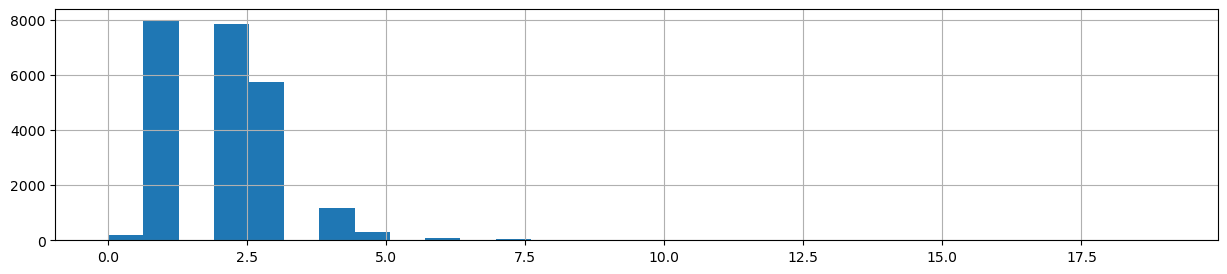

In [27]:
data.rooms.hist(bins = 30,figsize = (15,3));

In [28]:
data.rooms.value_counts().to_frame()

,rooms
1,7977
2,7859
3,5746
4,1162
5,314
0,192
6,99
7,57
8,11
9,8


In [29]:
#Избавляемся от аномалий в количествах комнат
data = data.query('rooms != 0  & rooms < 8 | rooms.isna()')

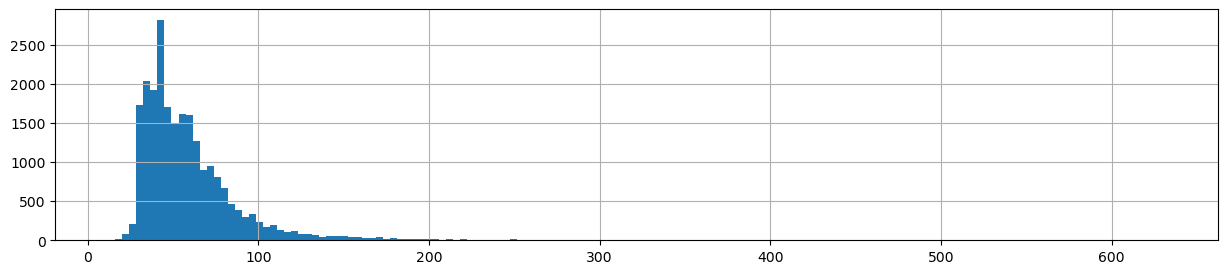

In [30]:
data.total_area.hist(bins = 150, figsize = (15,3));

In [31]:
#Избавляемся от аномалий в общей площади
data = data.query('total_area >20  & total_area < 251 | total_area.isna()')

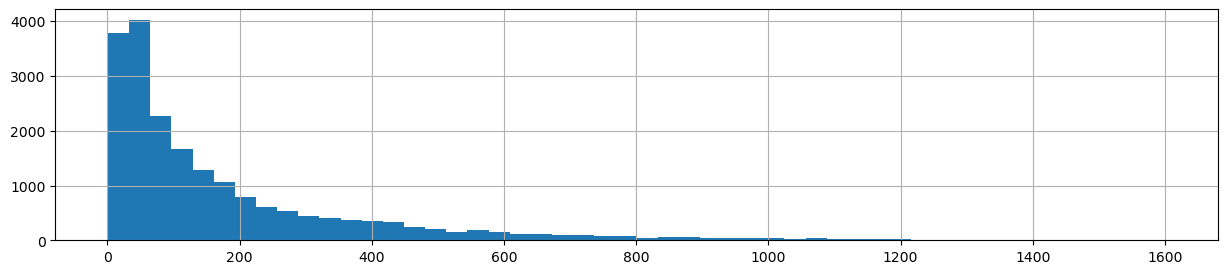

In [32]:
data.days_exposition.hist(bins = 50, figsize = (15,3), range = (1,1600));

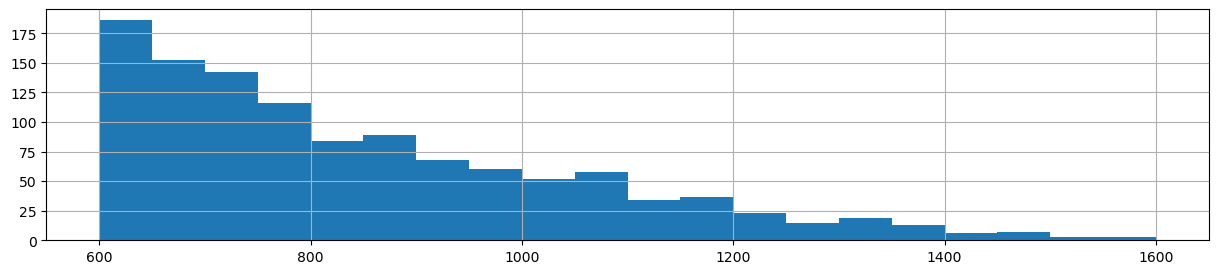

In [33]:
data.days_exposition.hist(bins = 20, figsize = (15,3), range = (600,1600));

In [34]:
#Избавляемся от аномалий в количестве дней размещения объявления на сайте.
data = data.query('days_exposition > 1  & days_exposition < 1000 | days_exposition.isna()')

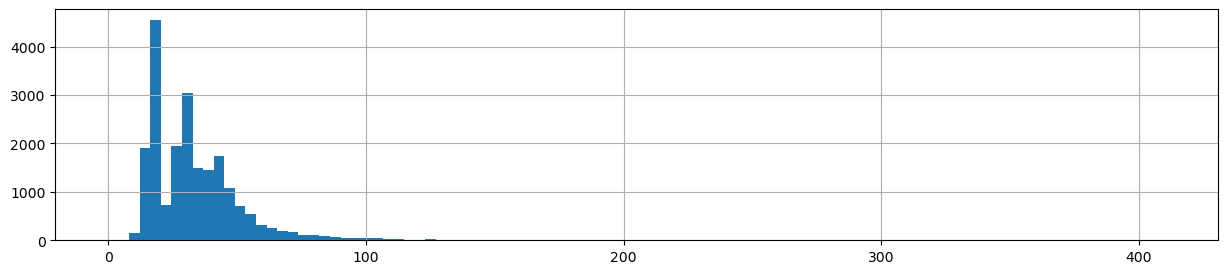

In [35]:
data.living_area.hist(bins = 100, figsize = (15,3), range = (0,410));

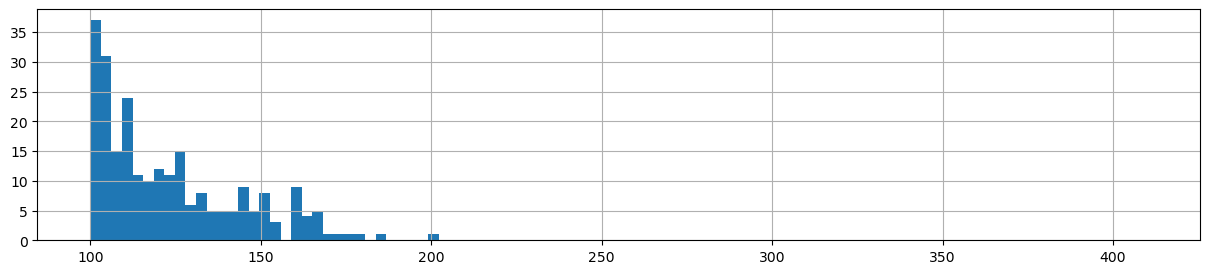

In [36]:
data.living_area.hist(bins = 100, figsize = (15,3), range = (100,410));

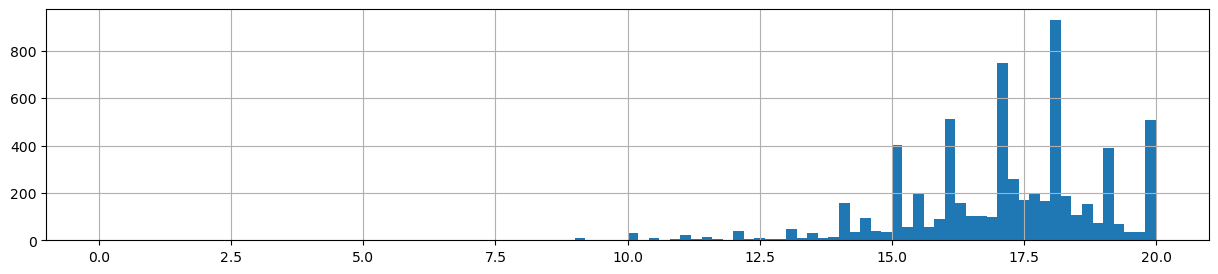

In [37]:
data.living_area.hist(bins = 100, figsize = (15,3), range = (0,20));

In [38]:
#Избавляемся от аномалий в жилой площади
data = data.query('living_area > 13  & living_area < 160 | living_area.isna()')

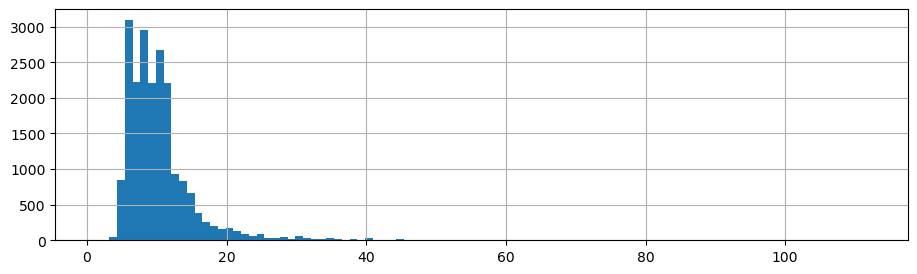

In [39]:
data.kitchen_area.hist(bins = 100, figsize = (11,3), range = (1,112));

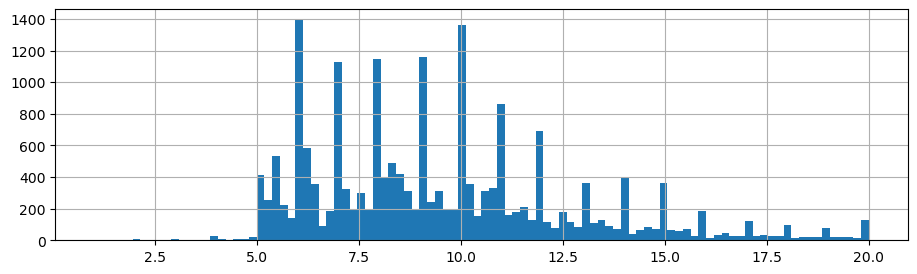

In [40]:
data.kitchen_area.hist(bins = 100, figsize = (11,3), range = (1,20));

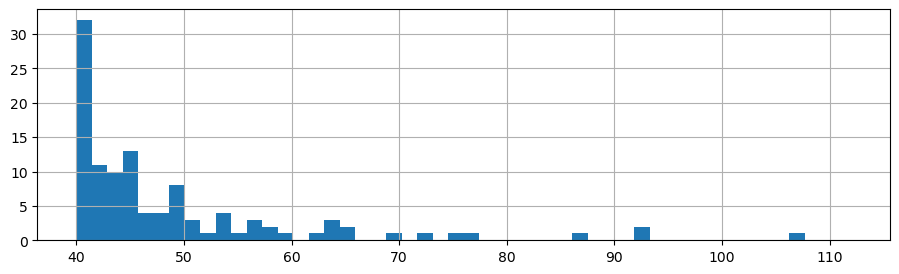

In [41]:
data.kitchen_area.hist(bins = 50, figsize = (11,3), range = (40,112));

In [42]:
#Избавляемся от аномалий в площади кухни.
data = data.query('kitchen_area > 4  & kitchen_area < 41 | kitchen_area.isna()')

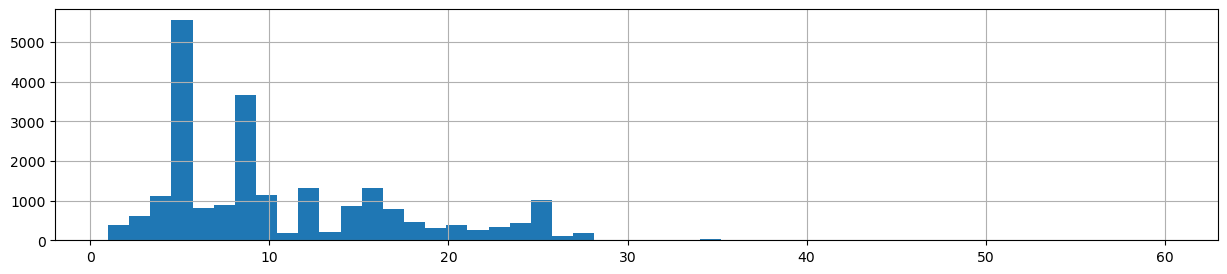

In [43]:
data.floors_total.hist(bins = 50, figsize = (15,3), range = (1,60));

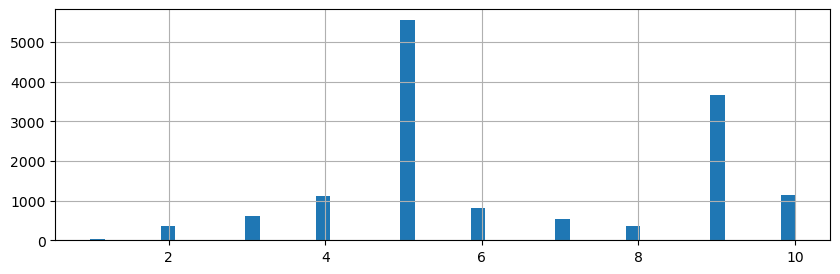

In [44]:
data.floors_total.hist(bins = 50, figsize = (10,3), range = (1,10));

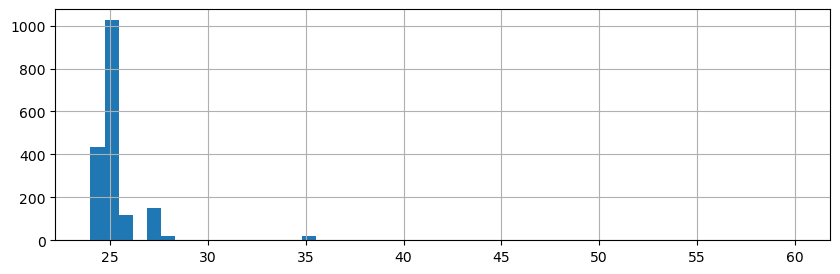

In [45]:
data.floors_total.hist(bins = 50, figsize = (10,3), range = (24,60));

In [46]:
#Избавляемся от аномалий в количестве этажей.
data = data.query('floors_total > 1  & floors_total < 27 | floors_total.isna()')

Проверим устранены ли аномалии.

In [47]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,242.00","22,242.00","13,702.00","19,235.00","22,242.00","20,469.00","20,313.00","22,242.00","22,242.00"
min,1.00,20.10,2.20,2.00,"430,000.00",13.10,4.10,1.00,2.00
max,7.00,250.30,3.98,999.00,"330,000,000.00",159.90,40.70,26.00,26.00


In [48]:
print(f'После обработки данных потери составили: {round(100-(23699/22242 * 100),2)} %')

После обработки данных потери составили: -6.55 %


Уровень потерь данных при предобработке 6.5 % некритичный, продолжаем анализ.

### Добавим  в таблицу новые столбцы необходимые для дальнейшего анализа

Создадим колоку в которой расчитаем цену за 1 квадратный метр и приведем тип колонки к целому числу.

In [49]:
data['price_1m'] = (data['last_price'] / data['total_area']).astype(int)

Создадим колонку в которой будет отображаться день недели в который вышла публикация

In [50]:
data['day_publication'] = data['first_day_exposition'].dt.dayofweek

Добавим столбцы с месяцем публикации и годом

In [51]:
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [52]:
data['year_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year

Проверим изменения в таблице

In [53]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,day_publication,month_publication,year_publication
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,True,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,True,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,True,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,True,...,NaN,NaN,NaN,NaN,NaN,55.0,95065,0,9,2018


Создадим  функцию с помощью которой мы заполним колонку отображающую тип этажа.

In [54]:
def floors_type(row):
    if row['floor'] == 1 & row['floors_total'] ==1:
        return('Первый')
    if row['floor'] == row['floors_total']:
        return('Последний')
    elif row['floor'] == 1:
        return('Первый')
    elif row['floor'] == 0 | row['floor'] < 0:
        return('Аномалия')

    else:
        return('Другой')

In [55]:
data['type_floor'] = data.apply(floors_type, axis = 1)

Создадим колонку в которой будут отображаться сколько километров до центра.    

In [56]:
data['km_to_center'] = (data['cityCenters_nearest'] / 1000).round(2)

## Исследовательский анализ данных

### Построим гистограммы для объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

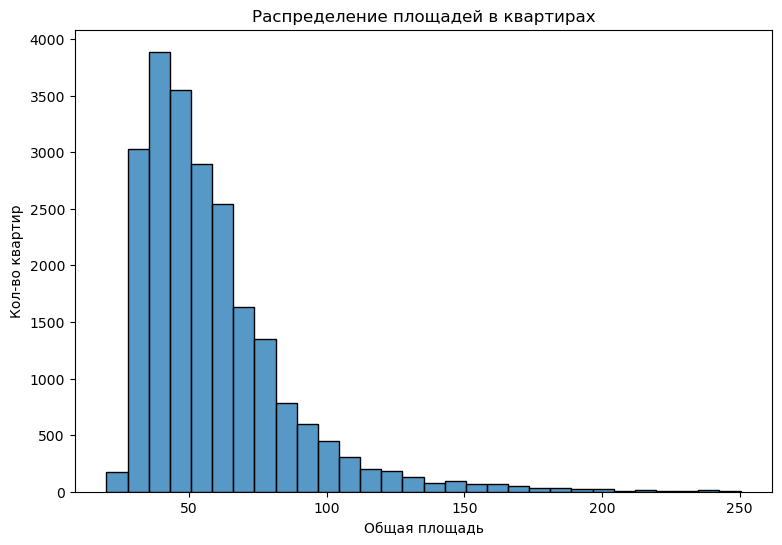

In [57]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='total_area', bins=30)
fig.set(xlabel='Общая площадь', ylabel = 'Кол-во квартир', title = 'Распределение площадей в квартирах');

Видим  что почти 1/5 всех обьяслений составляют квартиры с площадью от 40 до 50 метров 

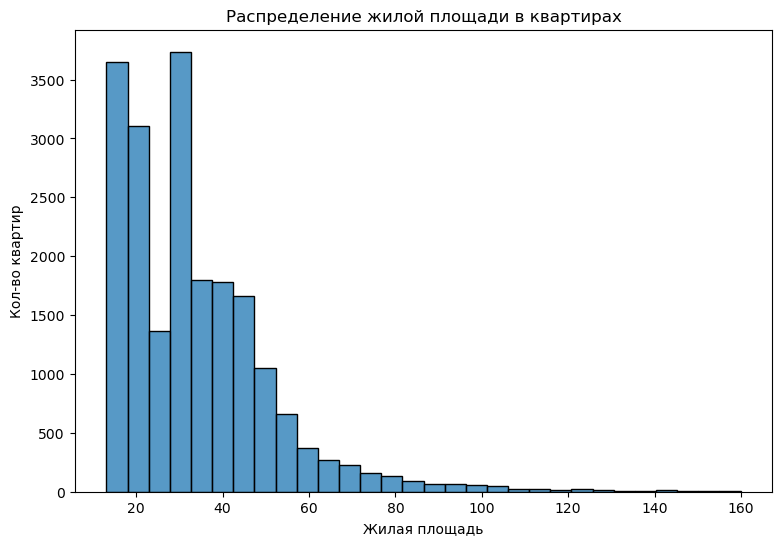

In [58]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='living_area', bins=30)
fig.set(xlabel='Жилая площадь', ylabel = 'Кол-во квартир', title = 'Распределение жилой площади в квартирах');

Больше всего предложений в которых жилая пощадь  в районе 30 метров. Квартир с жилой площадью больше 60 квадратных метров менее 10%

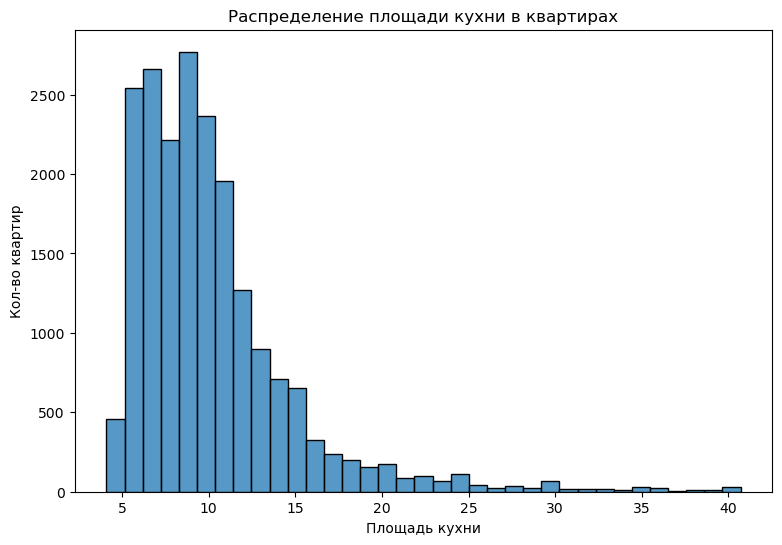

In [59]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='kitchen_area', bins=35)
fig.set(xlabel='Площадь кухни', ylabel = 'Кол-во квартир', title = 'Распределение площади кухни в квартирах');

В основном кухни размером от  6 до 12 метров. В  первых  3 графиках видна взаимосвязь между общей площадью, жилой площадью и площадью кухни 

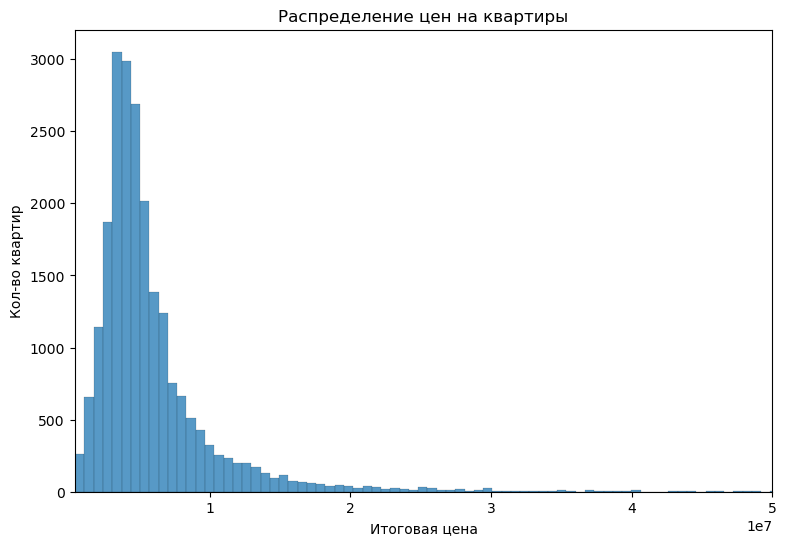

In [60]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='last_price', bins=500)
fig.set(xlabel='Итоговая цена', ylabel = 'Кол-во квартир', title = 'Распределение цен на квартиры'
       ,xlim = (400000,50000000));

Пик по цене наблюдается у квартир с еной от 4 до 7 миллионов. Менее 10 % квартир стоят выше 10 миллионов рублей

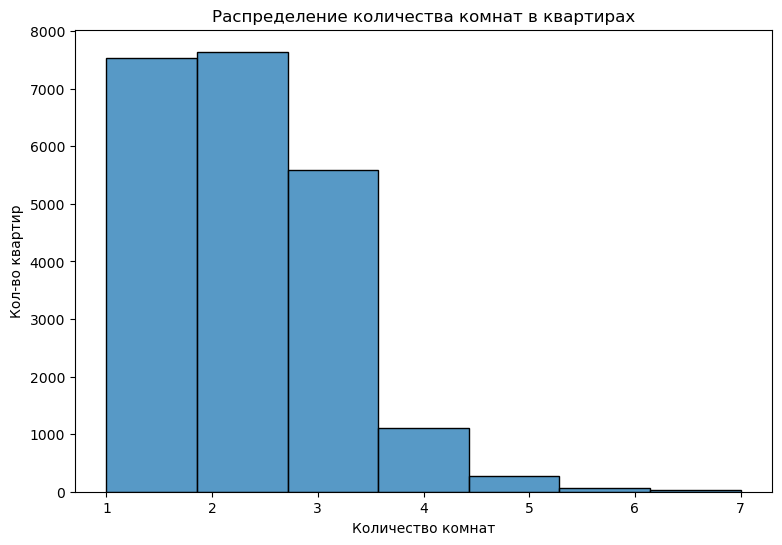

In [61]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='rooms', bins=7)
fig.set(xlabel='Количество комнат', ylabel = 'Кол-во квартир', title = 'Распределение количества комнат в квартирах');

Самые распространненные обьъявление это однокомнатные и двухкомнатные квартиры.

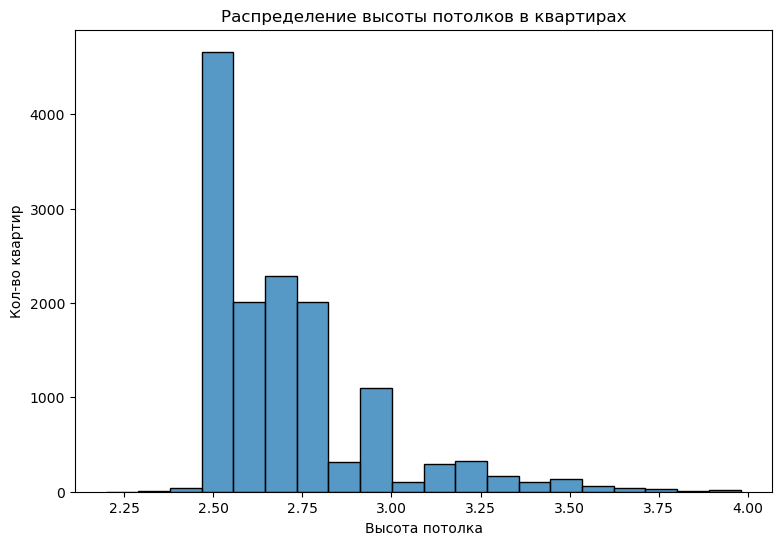

In [62]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='ceiling_height', bins=20)
fig.set(xlabel='Высота потолка', ylabel = 'Кол-во квартир', title = 'Распределение высоты потолков в квартирах');

В основном преобладает стандартная высота потолков в района 2.6-2.8 м

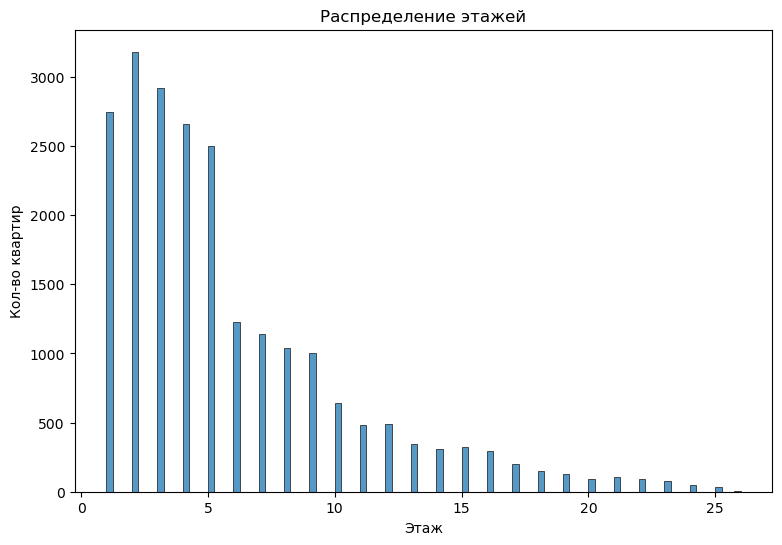

In [63]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='floor', bins=100)
fig.set(xlabel='Этаж', ylabel = 'Кол-во квартир', title = 'Распределение этажей');

Больше половины всех объявлений составляют квартиры с 1 по 4 этаж

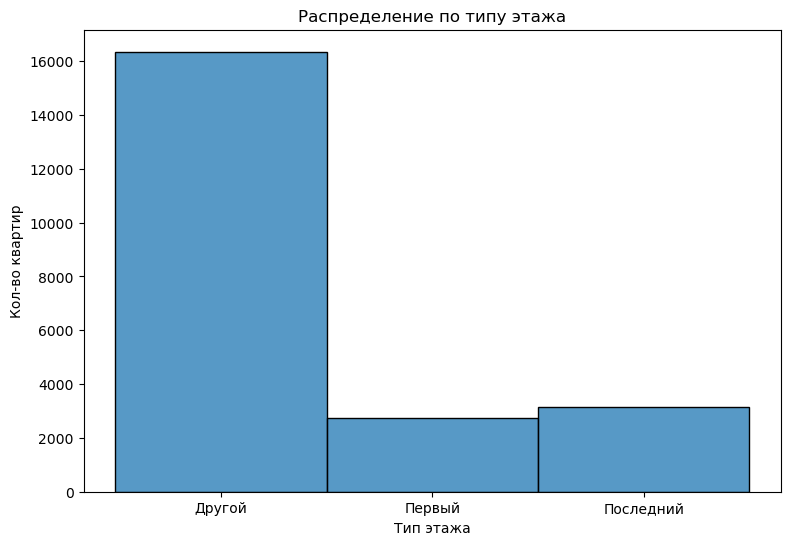

In [64]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='type_floor', bins=3)
fig.set(xlabel='Тип этажа', ylabel = 'Кол-во квартир', title = 'Распределение по типу этажа');

Количество объявлений продаваемых квартир на первом и последнеем этаже примерно одинаковые.

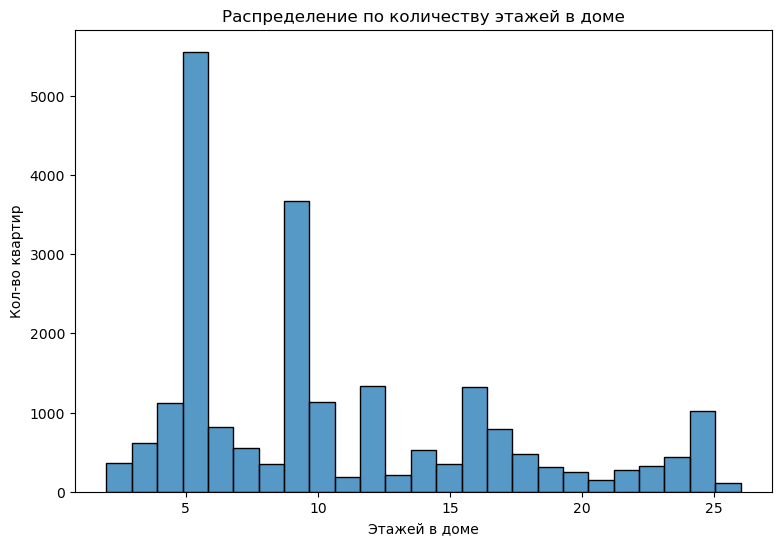

In [65]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='floors_total', bins=25)
fig.set(xlabel='Этажей в доме', ylabel = 'Кол-во квартир', title = 'Распределение по количеству этажей в доме');

На графике выделяются 2 пика 5 этаж и 9 этаж. Возможно это связано с тем что это наиболее распространенные типы домов

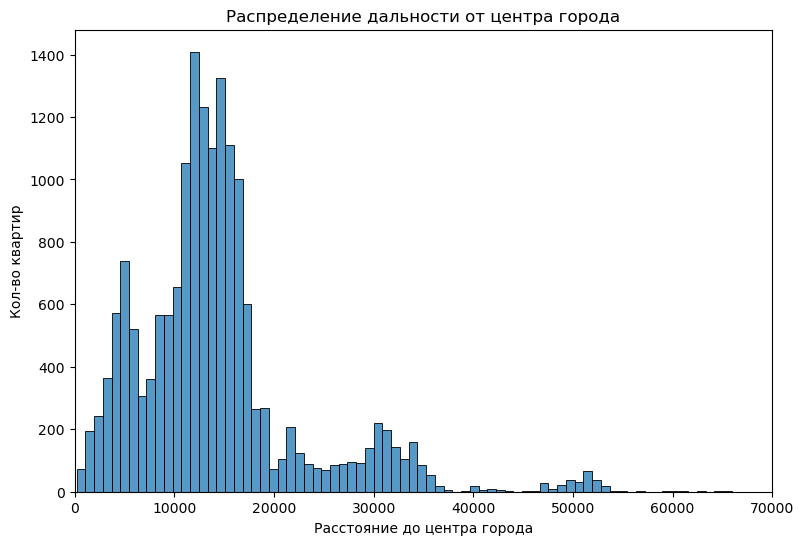

In [66]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='cityCenters_nearest', bins=75)
fig.set(xlabel='Расстояние до центра города', ylabel = 'Кол-во квартир', title = 'Распределение дальности от центра города'
       ,xlim = (0,70000));

На графике видно несколько пиков,  квартиры в районе 5 километров до центра и от 12 до 16 километров. Возможно изза нехватки 5519 значений

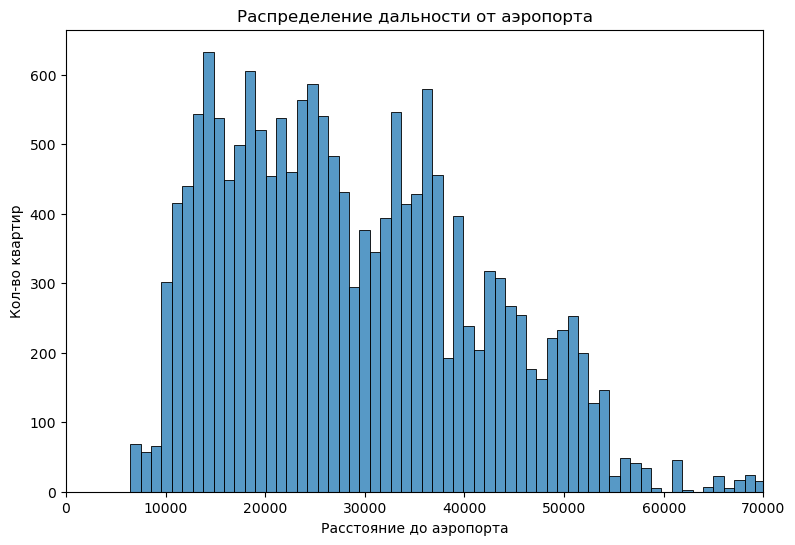

In [67]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='airports_nearest', bins=75)
fig.set(xlabel='Расстояние до аэропорта', ylabel = 'Кол-во квартир', title = 'Распределение дальности от аэропорта'
       ,xlim = (0,70000));

В основном квартиры продаются от 10 до 50 километров от аэропорта. Нехватает 5542 значений.

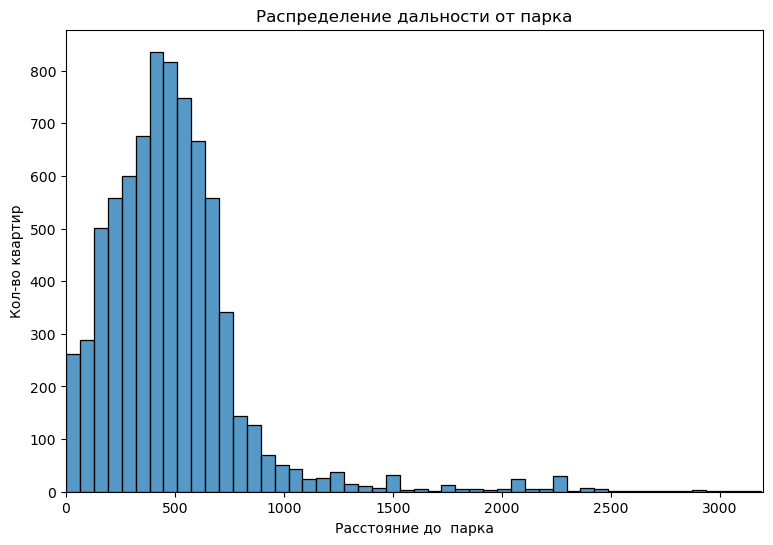

In [68]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='parks_nearest', bins=50)
fig.set(xlabel='Расстояние до  парка', ylabel = 'Кол-во квартир', title = 'Распределение дальности от парка'
       ,xlim = (0,3200));

Исходя из полученных данных видно что в большинстве случаев парки находятся не дальше 750 метров от продаваемой квартиры. Нехватает 15620 значений.

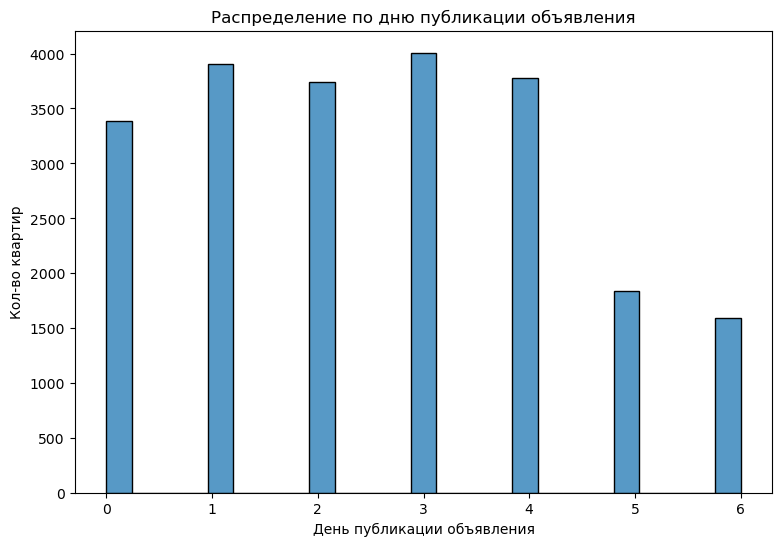

In [69]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='day_publication', bins=25)
fig.set(xlabel='День публикации объявления', ylabel = 'Кол-во квартир', title = 'Распределение по дню публикации объявления');

В основном объявления публиковались в будние дни.  Возможно связано с тем что люди предпочитали отдых на  выходных ,  а дела оставляли на будние дни.

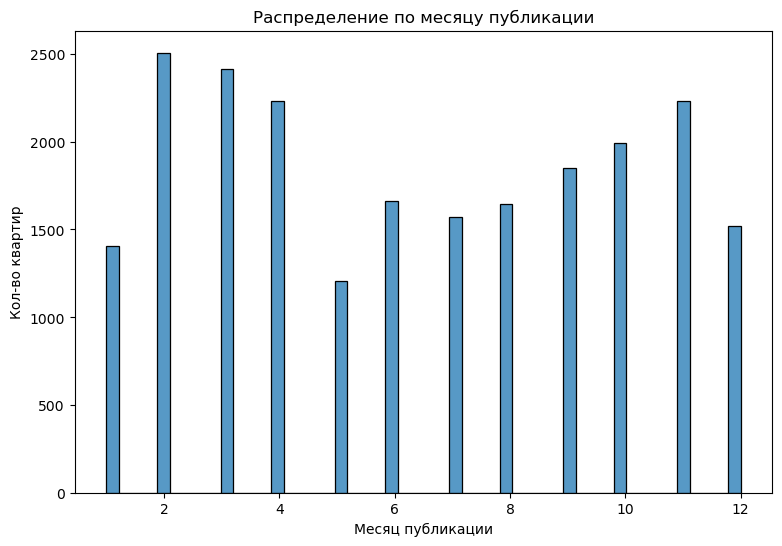

In [70]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='month_publication', bins=50)
fig.set(xlabel='Месяц публикации', ylabel = 'Кол-во квартир', title = 'Распределение по месяцу публикации');

В основном объявления публиковались  весной и осенью.

### Как быстро продаются квартиры?

Взглянем как быстро продавались квартиры

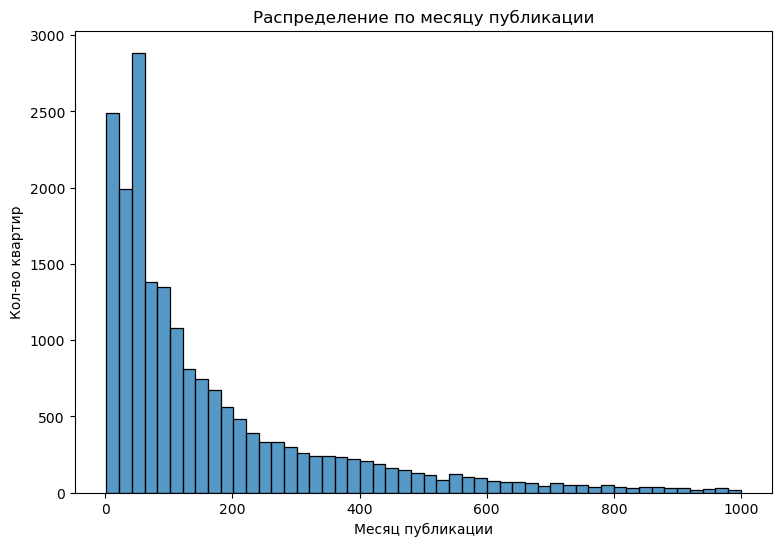

In [71]:
plt.figure(figsize=(9, 6))
fig = sns.histplot(data = data, x='days_exposition', bins=50)
fig.set(xlabel='Месяц публикации', ylabel = 'Кол-во квартир', title = 'Распределение по месяцу публикации');

In [72]:
data['days_exposition'].describe()

count    19235.000000
mean       167.042579
std        187.194240
min          2.000000
25%         44.000000
50%         93.000000
75%        220.000000
max        999.000000
Name: days_exposition, dtype: float64

Самая быстрая продажа квартиры произошла за 2 дня. В основном кватиры продаются до 3 месяцев.
Среднее значение по продажам составляет 167 дней,  медиана составляет 93 дня
Быстрыми продажами можно считать квартиры которые продались в течении 44дней , долгими те, которые продаются более 220 дней

### Факторы, которые больше всего влияют на стоимость объекта недвижимости.

Посмотрим какие факторы влияют на стоимость продажи. Посмотрим на корреляцию.

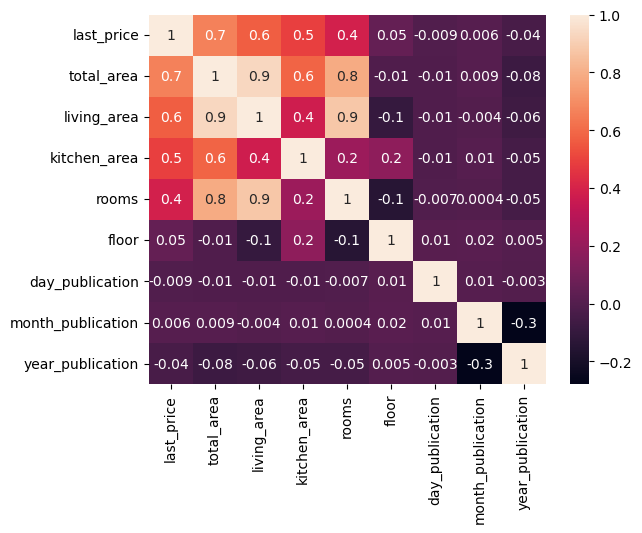

In [73]:
sns.heatmap(data[['last_price','total_area','living_area','kitchen_area','rooms'] +
         ['floor','day_publication','month_publication','year_publication']].corr()
            , annot = True
            , fmt='.1g'
           );

На стоимость продажи в основном влияет общая площадь,жилая площадь, площадь кухни

### Построим графики и посмотрим как зависит цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира;
- даты размещения.

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> ... , Создадим отдельно 8 графиков которые покажут зависимость цены от указанных параметров.

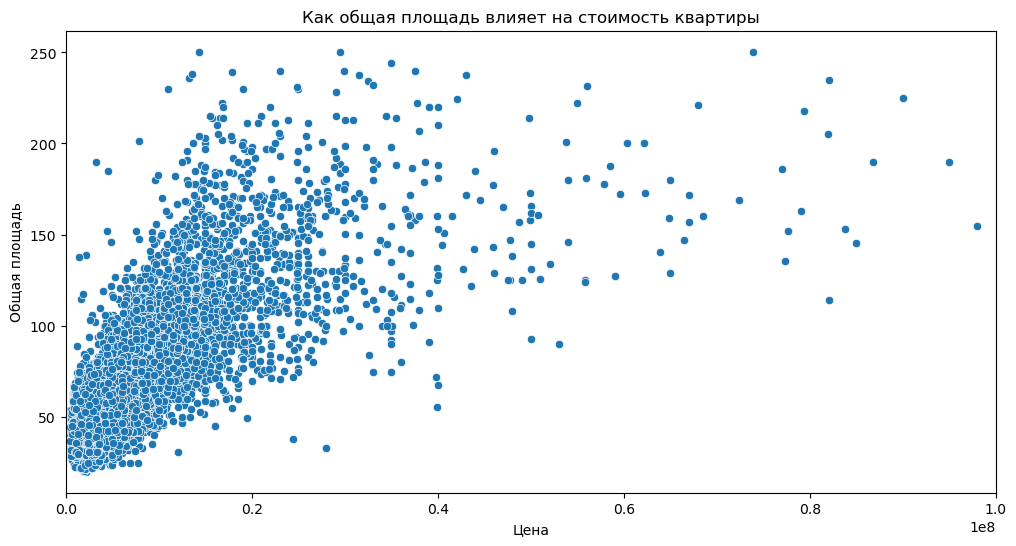

In [74]:
plt.figure(figsize=(12, 6))
fig = sns.scatterplot(data = data, x='last_price', y= 'total_area')
fig.set(xlabel='Цена', ylabel = 'Общая площадь', title = 'Как общая площадь влияет на стоимость квартиры'
       ,xlim = (0,100000000));

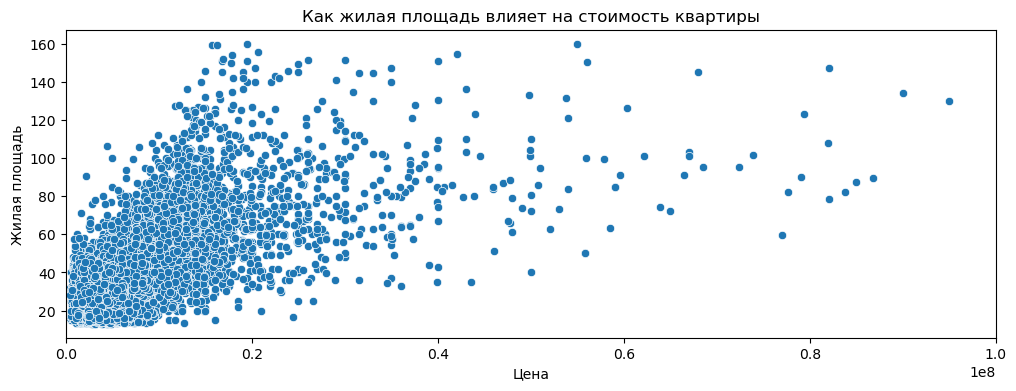

In [75]:
plt.figure(figsize=(12, 4))
fig = sns.scatterplot(data = data, x='last_price', y= 'living_area')
fig.set(xlabel='Цена', ylabel = 'Жилая площадь', title = 'Как жилая площадь влияет на стоимость квартиры'
       ,xlim = (0,100000000));

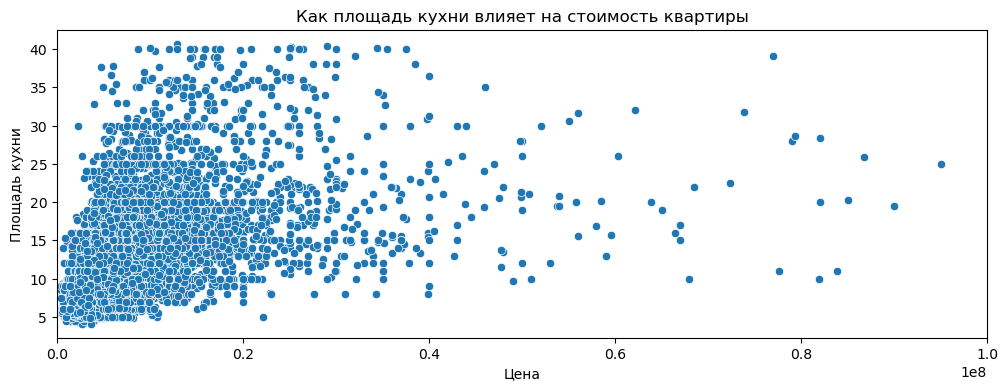

In [76]:
plt.figure(figsize=(12, 4))
fig = sns.scatterplot(data = data, x='last_price', y= 'kitchen_area')
fig.set(xlabel='Цена', ylabel = 'Площадь кухни', title = 'Как площадь кухни влияет на стоимость квартиры'
       ,xlim = (0,100000000));

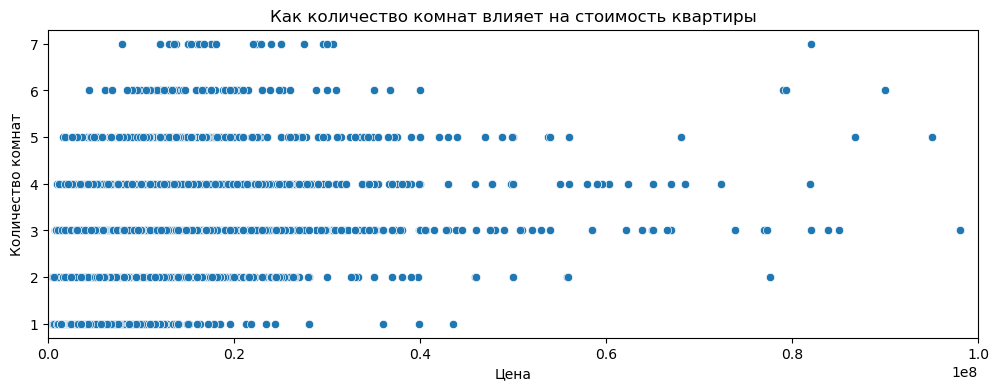

In [77]:
plt.figure(figsize=(12, 4))
fig = sns.scatterplot(data = data, x='last_price', y= 'rooms')
fig.set(xlabel='Цена', ylabel = 'Количество комнат', title = 'Как количество комнат влияет на стоимость квартиры'
       ,xlim = (0,100000000));

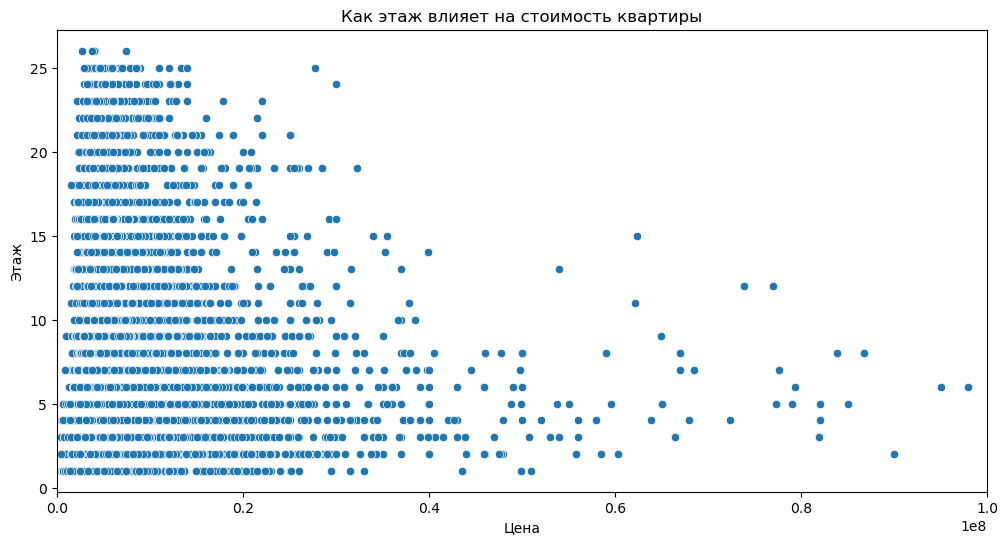

In [78]:
plt.figure(figsize=(12, 6))
fig = sns.scatterplot(data = data, x='last_price', y= 'floor')
fig.set(xlabel='Цена', ylabel = 'Этаж', title = 'Как этаж влияет на стоимость квартиры'
       ,xlim = (0,100000000));

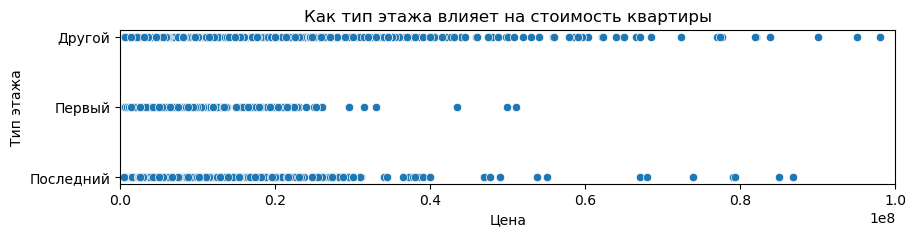

In [79]:
plt.figure(figsize=(10, 2))
fig = sns.scatterplot(data = data, x='last_price', y= 'type_floor')
fig.set(xlabel='Цена', ylabel = 'Тип этажа', title = 'Как тип этажа влияет на стоимость квартиры'
       ,xlim = (0,100000000));

- На итоговую цену влияет общая площадь, жилая площадь и площадь кухни.  
- Наличие 6-7 комнат не показатель высокой цены квартиры.   
- В основном квартиры где 3-5 комнат стоят дороже.   
- Дорогостоящие квартиры продаются в основном с 3 по 8 этаж.

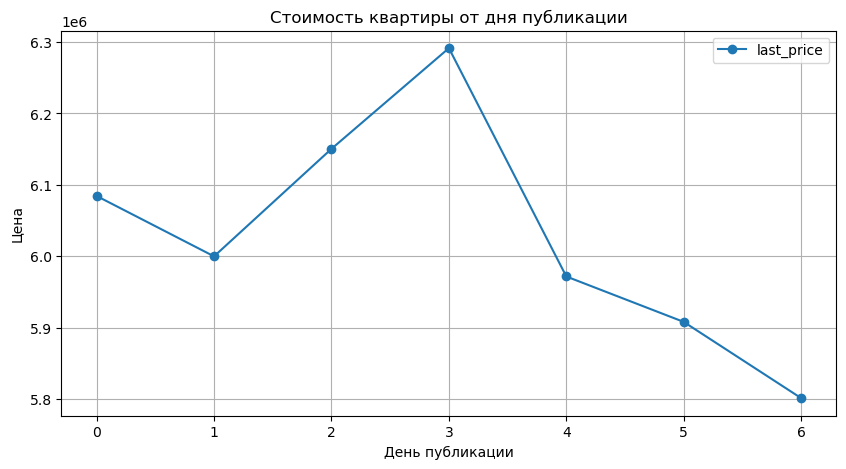

In [80]:
data.pivot_table(index='day_publication'
                 , values='last_price').plot(grid=True
                                            , style='o-'
                                            , figsize=(10, 5)
                                            ,title = 'Стоимость квартиры от дня публикации'
                                            ,xlabel = 'День публикации',ylabel = 'Цена'
                                            );

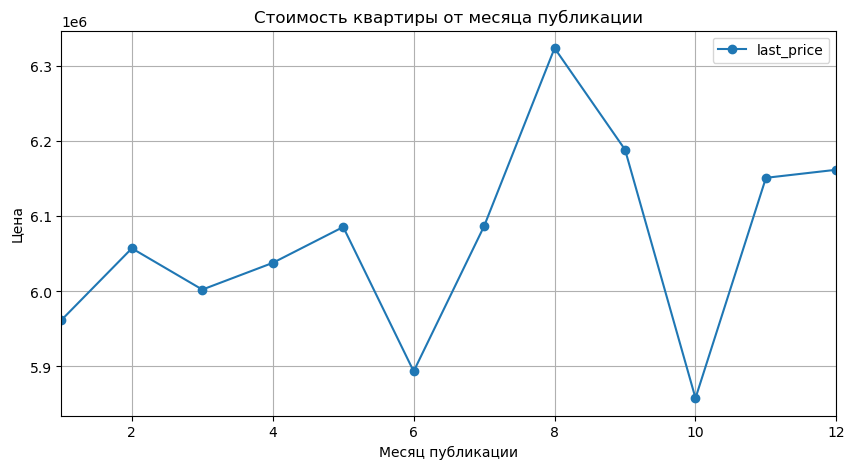

In [81]:
data.pivot_table(index='month_publication'
                 , values='last_price').plot(grid=True
                                            , style='o-'
                                            , figsize=(10, 5)
                                            ,xlim =(1,12)
                                            ,title = 'Стоимость квартиры от месяца публикации'
                                            ,xlabel = 'Месяц публикации',ylabel = 'Цена'
                                            );

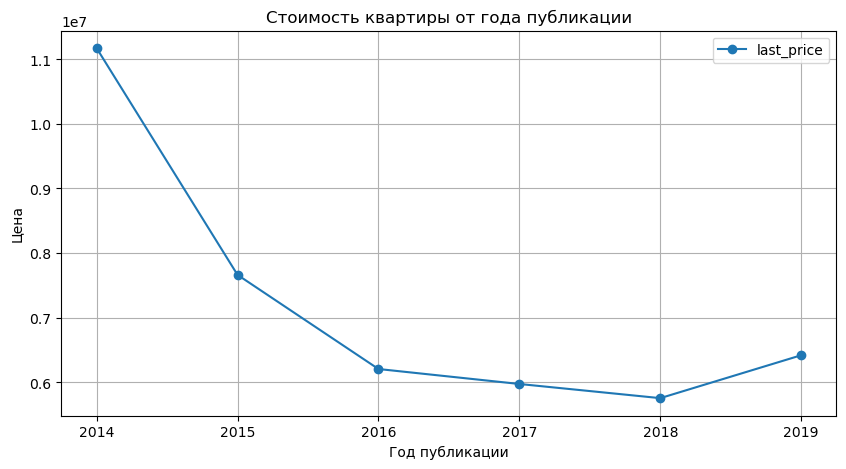

In [82]:
data.pivot_table(index='year_publication'
                 , values='last_price').plot(grid=True
                                            , style='o-'
                                            , figsize=(10, 5)
                                            ,title = 'Стоимость квартиры от года публикации'
                                            ,xlabel = 'Год публикации',ylabel = 'Цена'
                                            );

- Дороже оказались квартиры опубликованные в четвер, дешевле всего те, которые были опубликованы в воскресенье.  
- Пик цены приходится на летнее время.   

- C 2014 по 2016 квартиры резко подешевели, скорее всего это связанос кризисом , с 2018 года квартиры начали повышаться в цене.

### Средняя цена одного квадратного метра в 10 населенных пунктах с большим количеством объявлений.

Посчитаем в каких населенных пунктах больше всего объявлений.

In [83]:
top_locality = data['locality_name'].value_counts().head(10).reset_index()
top_locality

,index,locality_name
0,Санкт-Петербург,14789
1,посёлок Мурино,462
2,деревня Кудрово,434
3,посёлок Шушары,418
4,Всеволожск,380
5,Пушкин,353
6,Колпино,333
7,Гатчина,304
8,посёлок Парголово,255
9,Выборг,229


Посчитаем среднюю цену одного квадратного метра в этих населенных пунктах. 

In [84]:
top10 = data[data.locality_name.isin(top_locality['index'])]

In [85]:
top10 = (top10.groupby('locality_name')['last_price','total_area']
 .agg('sum')
 .sort_values(by = 'last_price',ascending = False)
 .reset_index()
)
top10['price_1m'] = round(top10['last_price']/top10['total_area'],1)
top10 = top10[['locality_name','price_1m']].sort_values(by= 'price_1m', ascending = False)
top10

,locality_name,price_1m
0,Санкт-Петербург,118075.6
1,Пушкин,104966.1
2,деревня Кудрово,93744.9
7,посёлок Парголово,85497.6
3,посёлок Мурино,82839.6
4,посёлок Шушары,75786.3
6,Колпино,73751.8
8,Гатчина,68888.4
5,Всеволожск,67634.2
9,Выборг,57914.6


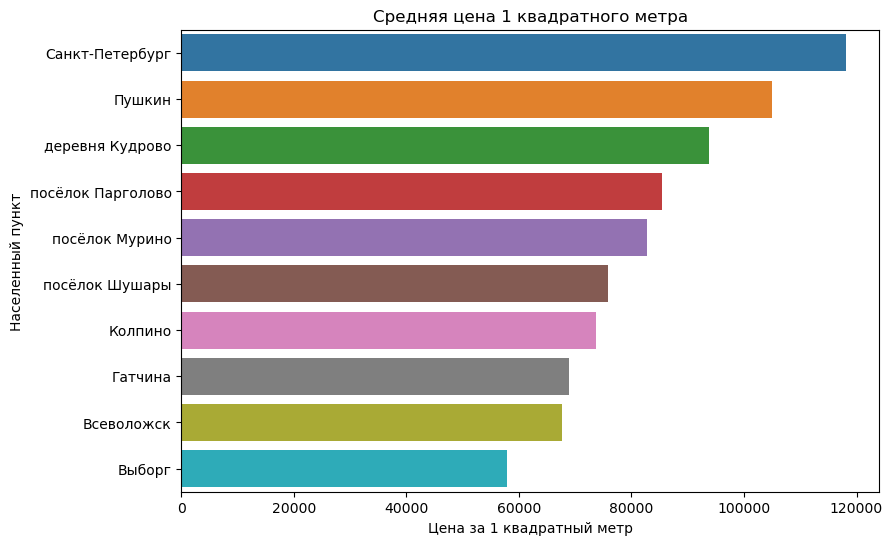

In [86]:
plt.figure(figsize=(9, 6))
fig = sns.barplot(data = top10, x='price_1m', y = 'locality_name')
fig.set(xlabel='Цена за 1 квадратный метр', ylabel = 'Населенный пункт'
        , title = 'Средняя цена 1 квадратного метра');

### Средняя цена каждого километра от Центра в Санкт - Петербурге.

Посчитаем среднюю цену в зависимости от километража до центра.
Создадим переменную в которую войдут все значения по городу Санкт-Петербург
Оставим необходимые для расчета колонки
Добавим колонку в которой расчитаем стоимость квадратного метра
Перезапишем переменную в которую войдет сводная талица которая в зависимости от километража посчитает среднюю цену за квадратный метр
Заменим название стоблца и выведем график

Создадим отдельный датасет,  куда войдут все записи по городу Санкт - Петербург.

In [87]:
data_sp = data.query('locality_name == "Санкт-Петербург"')

In [88]:
data_sp = data_sp.groupby('km_to_center')['last_price'].agg('mean')

In [95]:
data_sp = round(data_sp)

km_to_center
0.18     31099000.0
0.21      5800000.0
0.22     10990000.0
0.29      9590000.0
0.32     49333333.0
            ...    
28.64     4775000.0
28.81     4370000.0
29.26     4850000.0
29.34     4200000.0
29.49     2450000.0
Name: last_price, Length: 1902, dtype: float64

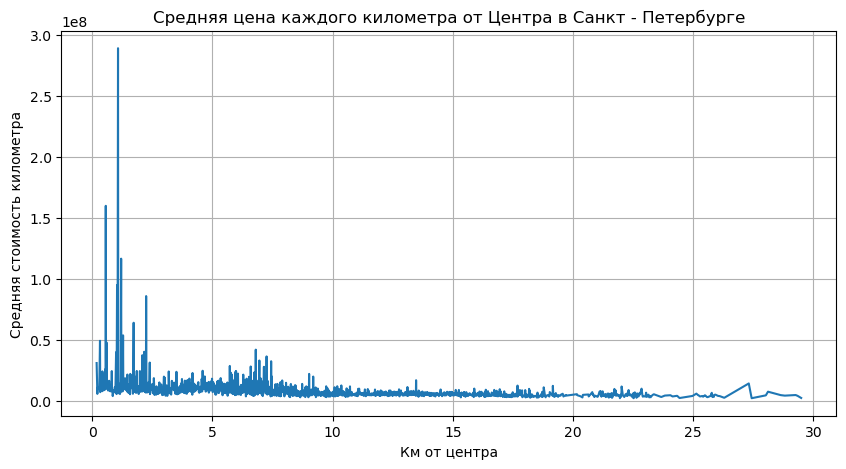

In [106]:
data_sp.plot(figsize = (10,5)
             , grid = True
             ,xlabel = 'Км от центра'
             ,ylabel = 'Средняя стоимость километра'
             ,title = 'Средняя цена каждого километра от Центра в Санкт - Петербурге'
            );

на графике видно что чем ближе квартира к центра города тем квадратный метр дороже. Так же на графике виден провал цены на 3 километре и скачек на 7 

Можно предположить что скачки вызваны и падения вызваны количеством квартир с низкой ценой 3 километре. если взять в расчет что на 2ом километре было 48 квартир ниже 7 миллионов , то на 3 м их 147. Также мы видим скачек на 7ом километре, вероятно изза того что там намного меньше квартир с низкой ценой относительно 6 и 8 го километра.

## Общий вывод:

На входе был получен Dataset с большим количеством пропусков.Запросить недостающие результаты было невозможно, поэтому пришлось заполнить часть недостающих значений теми которые подходят логически. Другую часть данных не трогали чтобы не исказить данные.   
Исходя из полученных данных можно сделать вывод, что:
- Основная масса объявлений  на рынке недвижимости имеет общую площадь от  40 до 65 квадратных метров, с ценой от 4 до 7,5 миллионов рублей. 
- Больше всего объявлений в 5ти и 9ти этажных домах.
- Весной и осенью люди охотнее публикуют объявления о продаже недвижимости.Так же предпочтительнее люди публикуют объявления в будние дни.
- В основном кватиры продаются до 3 месяцев. 
- Среднее значение по продажам составляет 167 дней,  медиана составляет 93 дня.
- Быстрыми продажами можно считать квартиры которые продались в течении 44дней , долгими те, которые продаются более 220 дней.
- На стоимость продажи квартиры в большей степени влияет общая площадь,жилая площадь, площадь кухни. Также на стоимость квартир повлиял кризис 2014 года, впоследствии квартиры стали дешеветь до 2017 года, далее замечен рост стоимости квартир.
- Самая высокая средняя стоимость квадратного метра недвижимости в Санкт-Петербурге, она составляет 124515 рублей за кв.м. 
- Самая низкая средняя стоимость квадратного метра недвижимости в Выборге, она составляет 57898 рублей за кв.м. -Средняя стоимость квадратного метра в Санкт - Петербурге зависит от расстояния до центра города.  